# The Best Books of All Time
## Homework for Algorithmic Methods of Data Mining and Laboratory 2023/2024

**Students:**

- Di Giammarco - 1838403 - digiammarco.1838403@studenti.uniroma1.it
- Pazzini Matteo - 1868953 -pazzini.1868953@studenti.uniroma1.it
- Satarova Begaiym - 2056861 - satarova.2056861@studenti.uniroma1.it

In [3]:
import pandas as pd
import numpy as np


## [RQ1]
Exploratory Data Analysis (EDA) - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.

### Analyze the data

First thing first, let's load the two datasets.

In [2]:
data_auth = pd.read_json('lighter_authors.json',lines=True)
data_auth.drop(["about","image_url"],axis=1,inplace=True)

In [4]:
data_books = pd.read_json('lighter_books.json',lines=True,chunksize=100000)
TOTAL_DF = pd.DataFrame()
for chunk in data_books:  #drop columns that are not useful or that are redundant
    PARTIAL_DATA = chunk[['id', 'title', 'authors', 'author_name', 'author_id', 'work_id','language', 'average_rating', 'rating_dist',
       'ratings_count', 'text_reviews_count', 'publication_date',
       'original_publication_date', 'format','num_pages']]
    TOTAL_DF = pd.concat([TOTAL_DF,PARTIAL_DATA])


As we can see, TOTAL_DF must be loaded in chunks since it's nearly impossible to read it in one go. Also, useless columns are dropped since they don't add anything to the data analysis. Columns containg descriptions or url (in general "strings") are extremely heavy on the memory, and unless we are performing operations on such columns we can drop them.

In [5]:
data_auth.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,179


In [6]:
TOTAL_DF.head()

,id,title,authors,author_name,author_id,work_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,original_publication_date,format,num_pages
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,eng,4.50,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2004-09,2003-06-21,Paperback,870
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,eng,4.48,5:4801606|4:1681521|3:623286|2:145898|1:125040...,7377351,116930,2003-11-01,1997-06-26,Hardcover,309
2,4,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,1077326,6231171,eng,4.43,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,2855044,55286,2003-11-01,1998-07-02,Hardcover,352
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,eng,4.57,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,2946694,58023,2004-05-01,1999-07-08,Mass Market Paperback,435
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,eng,4.56,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2705676,48637,2002-09-28,2000-07-08,Paperback,734


In [7]:
data_auth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 26.8+ MB


In [8]:
TOTAL_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027431 entries, 0 to 7027430
Data columns (total 15 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   title                      object 
 2   authors                    object 
 3   author_name                object 
 4   author_id                  int64  
 5   work_id                    int64  
 6   language                   object 
 7   average_rating             float64
 8   rating_dist                object 
 9   ratings_count              int64  
 10  text_reviews_count         int64  
 11  publication_date           object 
 12  original_publication_date  object 
 13  format                     object 
 14  num_pages                  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 804.2+ MB


Let's now take a look at the NAN values, if any

In [9]:
(TOTAL_DF.isnull().sum()/len(TOTAL_DF))*100

id                            0.000000
title                         0.000000
authors                      76.254253
author_name                   0.000000
author_id                     0.000000
work_id                       0.000000
language                      0.000000
average_rating                0.000000
rating_dist                   0.000000
ratings_count                 0.000000
text_reviews_count            0.000000
publication_date              0.000000
original_publication_date     0.000000
format                        0.000000
num_pages                     0.000000
dtype: float64

More than 76% of the "authors" are missing, but that column lists every author that has contributed to a specific book, so the percentage makes sense if we think that usually just one person works on a book

### Statistics summary

In [10]:
data_auth.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


In [11]:
TOTAL_DF.describe()

,id,author_id,work_id,average_rating,ratings_count,text_reviews_count
count,7.027431e+06,7.027431e+06,7.027431e+06,7.027431e+06,7.027431e+06,7.027431e+06
mean,1.326720e+07,1.977793e+06,1.398533e+07,3.306188e+00,1.945861e+04,6.417258e+02
std,7.637922e+06,3.210660e+06,1.535637e+07,1.435734e+00,1.609008e+05,4.169806e+03
min,2.000000e+00,4.000000e+00,6.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.937444e+06,3.368200e+04,1.564717e+06,3.360000e+00,3.000000e+00,0.000000e+00
50%,1.422732e+07,2.499460e+05,6.759579e+06,3.810000e+00,4.500000e+01,5.000000e+00
75%,1.953942e+07,3.239281e+06,2.198795e+07,4.080000e+00,7.710000e+02,6.400000e+01
max,2.552102e+07,2.124802e+07,8.972161e+07,5.000000e+00,7.400639e+06,1.745240e+05


In [12]:
USABLE_DF = TOTAL_DF.copy() #create a copy of the dataset


In data_auth there's something wrong with the min, so we need to drop some values

In [13]:
data_auth = data_auth.loc[(data_auth["ratings_count"]>=0) & (data_auth["average_rating"] >=1) & (data_auth["fans_count"] >=0)]

The dataset will be cleaned more during each and every question

## [RQ2] Let’s finally dig into this vast dataset, retrieving some vital information:

###Plot the number of books for each author in descending order

<Axes: xlabel='name'>

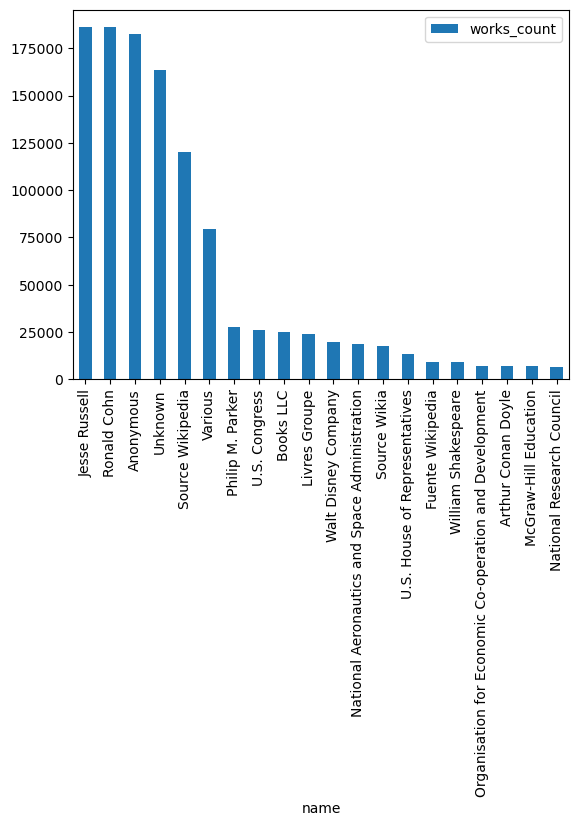

In [14]:
nb_books = data_auth[["name","works_count"]]
nb_books = nb_books.sort_values(by="works_count",ascending=False).iloc[1:21]
nb_books.plot(x="name",kind="bar")

As we can see, not every author is a person(some are Institutions). Also, we printed the first 20 in descending order to give an idea of the scale. Technically the first author was "NOT A BOOK" with more than 1.5 million books, but as specified in the "about" section, "this profile was created to segregate those items which have ISBNs or ASINs but are not considered part of our catalog"

###Which book has the highest number of reviews?

In [15]:
USABLE_DF = USABLE_DF.loc[USABLE_DF["average_rating"] >=1]

In [16]:
rating_counts_book = USABLE_DF[["title","ratings_count"]]
rating_counts_book = rating_counts_book.sort_values(by="ratings_count",ascending=False).iloc[0][0]
print("The book with the highest number of reviews is", rating_counts_book)

The book with the highest number of reviews is Harry Potter und der Stein der Weisen (Harry Potter,#1)


###Which are the top ten and ten worst books concerning the average score?

In [17]:
Highest_score = USABLE_DF.sort_values(by="average_rating",ascending=False).iloc[:10]
Lowest_score = USABLE_DF.sort_values(by="average_rating").iloc[:10]
#Highest_score[["name","average_score"]].
print(Highest_score[["title","average_rating"]])
print(Lowest_score[["title","average_rating"]])

                                                     title  average_rating
2877874                                         Sin Killer             5.0
3667969                                          White Oak             5.0
318798   Bratty Brothers and Selfish Sisters: All about...             5.0
5340272                        The Princess and the Popper             5.0
1604861                                             D.N.A.             5.0
6084871                                   Jahrhundertspiel             5.0
6084876                                     Ties that bind             5.0
6084885                                      Rund der Hund             5.0
5340260                              Medieval Tile Designs             5.0
1604840  Life Application Bible: New Testament: The Liv...             5.0
                                                     title  average_rating
2524320                            Sensual Phrase Chapters             1.0
5739507       Successful 

As we can see, 1 and 5 ratings are present and taken into consideration

###Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

<Axes: ylabel='count'>

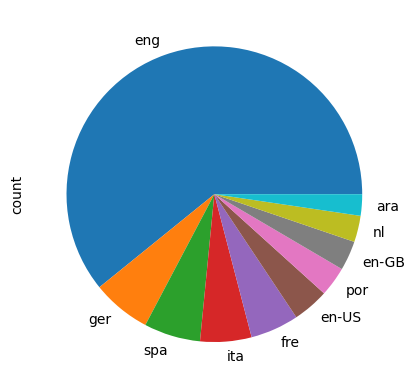

In [18]:
languages = USABLE_DF.loc[USABLE_DF["language"]!='',:]
languages = languages["language"]
languages.value_counts()[:10].plot.pie()

With a pie chart it's easy to see that the majority of books are written in english

###How many books have more than 250 pages?

In [19]:
Number_books = USABLE_DF.loc[USABLE_DF["num_pages"]!='',:]  #with this, we filter out everything that is not a number

filtered = Number_books[Number_books["num_pages"] > 250]
print("The number of books with over 250 pages is",filtered["num_pages"].count())

The number of books with over 250 pages is 1651330


###Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books)

<Axes: xlabel='name'>

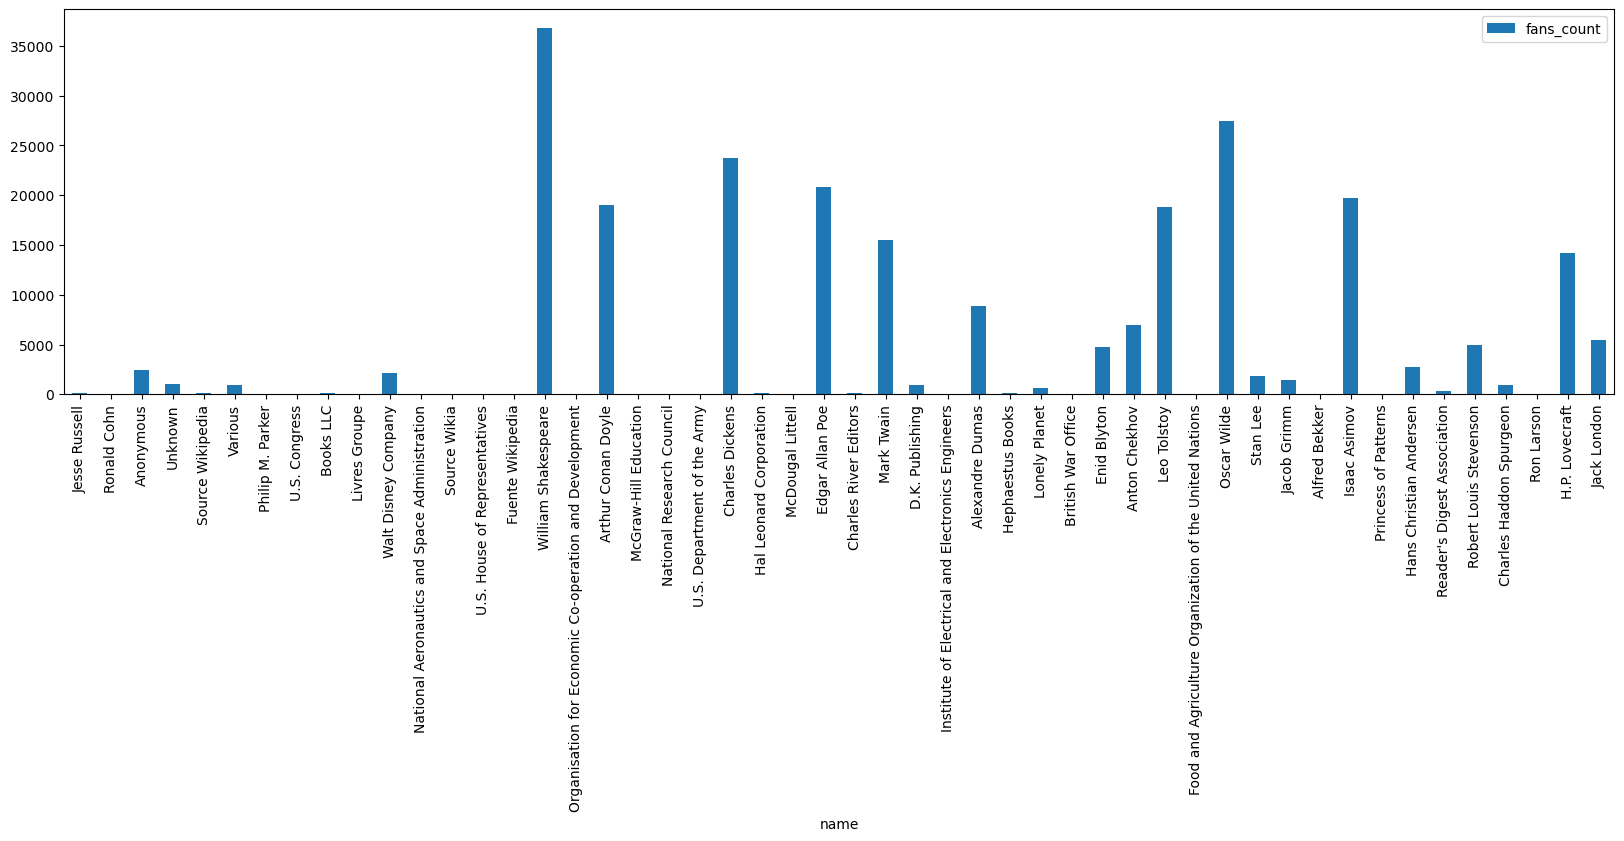

In [20]:
p_o = data_auth[["name","works_count","fans_count"]]
Prolific_authors = p_o.sort_values(by="works_count",ascending=False).iloc[1:51]
Prolific_authors[["name","fans_count"]].plot(x="name",y="fans_count",kind="bar",figsize=(20,5))


Even though they have more books, we notice that the amount of fans of "U.S Congress" is way less than (for instance) "William Shakespeare"

## [RQ3] Let’s have a historical look at the dataset!





### Write a function that takes as input a year and returns as output the following information:

   - The number of books published that year.

   - The total number of pages written that year.

   - The most prolific month of that year.

   - The longest book written that year.

In [21]:
USABLE_DF_1 = TOTAL_DF.copy()

In [22]:
USABLE_DF_1['num_pages'] = USABLE_DF_1['num_pages'].replace("", np.nan) # turns the "" values into nan in the column num_pages
USABLE_DF_1['num_pages'] = USABLE_DF_1['num_pages'].astype('Int64') # turns the STRING MM into INT
USABLE_DF_1['average_rating'] = USABLE_DF_1['average_rating'].replace(0, np.nan) # turns the 0 values into nan in the column average_rating

In [23]:
import calendar
def year_info(year):
    year_df = USABLE_DF_1[USABLE_DF_1['year'] == year]
    num_books = year_df['title'].count() # number of books published that year
    total_pages = year_df['num_pages'].astype('Int64').fillna(0).sum() # total number of pages written that year considering NA as 0
    most_prolific_month = year_df['month'].value_counts().idxmax() #most prolific month of that year.
    longest_book = year_df.loc[year_df['num_pages'].idxmax()]['title'] # longest book written that year.
    month_name = calendar.month_name[most_prolific_month]

    print(f"In the year {year} a total of {num_books} books have been published.\n The total number of pages written in that year is {total_pages}, the most prolific month was {month_name}. \n Lastly, the longest book was '{longest_book}'")

In [24]:
USABLE_DF_1 = USABLE_DF_1.loc[USABLE_DF_1["publication_date"]!='',:] #we take all the rows besides the empty ones
#only YYYY,YYY,YY,Y,YYYY-MM-DD,YYY-MM-DD,YYYY-MM, YYY-MM
USABLE_DF_1 = USABLE_DF_1[USABLE_DF_1.publication_date.str.contains(r'^\d{1}$|^\d{2}$|^\d{3}$|^\d{4}$|^\d{4}-\d{2}-\d{2}$|^\d{3}-\d{2}-\d{2}$|^\d{4}-\d{2}$|^\d{3}-\d{2}$')]

In [25]:
USABLE_DF_1['year'] = USABLE_DF_1['publication_date'].str.split('-').str[0] #take only the years out of the Regex
USABLE_DF_1['year'] = USABLE_DF_1['year'].astype(int) # turns the STRING YYYY into INT
USABLE_DF_1 = USABLE_DF_1[USABLE_DF_1['year'] < 2023] #takes the values before 2023

In [26]:
USABLE_DF_1['month'] = USABLE_DF_1['publication_date'].str.split('-').str[1] #take only the months out of the Regex
USABLE_DF_1['month'] = USABLE_DF_1['month'].astype('Int64') # turns the STRING MM into INT
USABLE_DF_1 = USABLE_DF_1[(USABLE_DF_1['month'] >= 1) & (USABLE_DF_1['month'] <= 12)] #takes the values between 1 and 12

In [27]:
#Example
year_info(2000)

In the year 2000 a total of 74920 books have been published.
 The total number of pages written in that year is 15239836, the most prolific month was January. 
 Lastly, the longest book was 'When All You've Ever Wanted Isn't Enough / Harold S. Kushner'


### Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

In [28]:
#Here is the same function as before but without the long print and just a return
def year_info(year):
    year_df = USABLE_DF_1[USABLE_DF_1['year'] == year]
    num_books = year_df['title'].count() # number of books published that year
    total_pages = year_df['num_pages'].astype('Int64').fillna(0).sum() # total number of pages written that year considering NA as 0
    most_prolific_month = year_df['month'].value_counts().idxmax() #most prolific month of that year.
    longest_book = year_df.loc[year_df['num_pages'].idxmax()]['title'] # longest book written that year.

    return num_books, total_pages, most_prolific_month, longest_book

In [29]:
def add_to_df():
    n = int(input("How many years would you like to write? "))
    data_dict = {}
    for i in range(n):
        new_year = int(input("Please give me a year: "))
        year_data = year_info(new_year)
        data_dict[new_year] = {
            'num_books': year_data[0],
            'total_pages': year_data[1],
            'most_prolific_month': year_data[2],
            'longest_book': year_data[3]
        }
    new_df = pd.DataFrame.from_dict(data_dict, orient='index') #create a dataframe from the dictionary
    new_df.index.name = 'Year' #name of the index is 'Year'
    print(f"Congrats, you created this DataFrame:\n{new_df}\n\n Here is head(10):\n{new_df.head(10)}\n\n And here is the tail(10): \n{new_df.tail(10)}")

In [30]:
add_to_df()


ValueError: invalid literal for int() with base 10: ''

### Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.

In [32]:
#CHATGPT code:
import pandas as pd

def get_yearly_info(year):
    # Filter the DataFrame for the given year
    yearly_df = USABLE_DF_1[USABLE_DF_1['year'] == year]

    # Number of books published that year
    num_books = yearly_df.shape[0]

    # Total number of pages written that year
    total_pages = yearly_df['num_pages'].sum()

    # Find the most prolific month of that year
    month_counts = yearly_df['month'].value_counts()
    most_prolific_month = month_counts.idxmax()
    most_prolific_month_count = month_counts.max()

    # Find the longest book written that year
    longest_book = yearly_df[yearly_df['num_pages'] == yearly_df['num_pages'].max()]

    if not longest_book.empty:
        longest_book_title = longest_book.iloc[0]['title']
        longest_book_pages = longest_book.iloc[0]['num_pages']
    else:
        longest_book_title = "N/A"
        longest_book_pages = 0

    return {
        "Year": year,
        "Number of Books Published": num_books,
        "Total Number of Pages Written": total_pages,
        "Most Prolific Month": most_prolific_month,
        "Books Published in Most Prolific Month": most_prolific_month_count,
        "Longest Book Title": longest_book_title,
        "Longest Book Pages": longest_book_pages
    }

The chatbot implementation works
In order to test it out and verify the correctness of the implementation we'll use both the functions and check if they have the same answer

In [33]:
year = 2021
#CHATGPT
year_info_chat = get_yearly_info(year)
print(year_info_chat)
#OURS
year_info_ours = year_info(year)
num_books, total_pages, most_prolific_month, longest_book = year_info_ours
print(num_books, total_pages, most_prolific_month, longest_book)

{'Year': 2021, 'Number of Books Published': 200, 'Total Number of Pages Written': 47114, 'Most Prolific Month': 1, 'Books Published in Most Prolific Month': 75, 'Longest Book Title': 'Policing', 'Longest Book Pages': 1736}
200 47114 1 Policing


## [RQ4] Quirks questions about consistency. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.

### You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?


In [34]:
import difflib


def remove_similar_names(data_auth):
    '''
    Using difflib we can compute the difference between two hashable strings. The higher the ratio, the
    more similar the strings are. If the threshold is extremely high (95% in this case), then the name is
    pretty much the same. By creating a list of similar name, we can drop that list from the original df
    '''

    similar_names = set()
    Unique = data_auth["name"].drop_duplicates().dropna().tolist()


    for name1, name2 in zip(Unique, Unique[1:]):

        similarity = difflib.SequenceMatcher(None, name1, name2).ratio()

        if (similarity > 0.95):
            similar_names.add(name1)
            similar_names.add(name2)

    filtered_data = data_auth[~data_auth['name'].isin(similar_names)]

    return filtered_data

data_auth = remove_similar_names(data_auth)



The answer is no. There are eponymous in our dataset

### Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [35]:
def Information(authors_id_list):   #author list in input
    author_info = {}
    for ids in authors_id_list:
        infor = USABLE_DF[USABLE_DF.author_id==ids]  #filter only the id that we need from the USABLE_DF, and then create a list with the book names associated to that id
        infor=infor["title"].to_list()
        author_info[ids] = infor #create the dictionary with id as key and list as value
    return author_info

test = Information([1077326])  #Just a test to check if works
print(test)

{1077326: ['Harry Potter and the Order of the Phoenix (Harry Potter, #5)', "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)", 'Harry Potter and the Chamber of Secrets (Harry Potter, #2)', 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)', 'Harry Potter and the Goblet of Fire (Harry Potter, #4)', 'The Harry Potter Collection (Harry Potter, #1-6)', 'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)', 'Harry Potter Collection (Harry Potter, #1-6)', 'Harry Potter Schoolbooks Box Set: Two Classic Books from the Library of Hogwarts School of Witchcraft and Wizardry', 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)', 'Harry Potter et la Chambre des Secrets (Harry Potter, #2)', 'Harry Potter y la piedra filosofal (Harry Potter, #1)', 'Harry Potter Y La Piedra Filosofal (Harry Potter, #1)', "Harry Potter and the Philosopher's Stone", 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)', '混血王子的背叛 (哈利波特, #6)', '火盃的考驗 (哈利波特, #4)', 'Harry Potter y la pi

### What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

In [36]:
Books_avg = USABLE_DF.sort_values(by="average_rating",ascending=False).iloc[:20] #Sort by average rating and select the top 20

def sorter(x):          #Use a sorter function to compute the string lenght
    return sorted(x, key=len, reverse=True)

Books_avg["title"].apply(sorter).str.len().sort_values(ascending=False) #apply the sorter function defined before, compute the string lenght and then sort everything.

1106403    66
318798     62
1604840    55
1604794    47
5340239    44
1604815    39
6386361    33
2734565    30
5340272    27
1604797    23
5340260    21
6084871    16
6084876    14
6662098    13
6084885    13
1604809    12
6386378    10
2877874    10
3667969     9
1604861     6
Name: title, dtype: int64

In [38]:
Books_avg = USABLE_DF.sort_values(by="average_rating",ascending=False) #call Boooks_avg a second time, but on the entire dataset
Books_avg["title"].apply(sorter).str.len().sort_values(ascending=False).iloc[:10] #As we can see it's not the longest title (and the top 10 is truncated to 255)


3130026    255
3255694    255
3242976    255
5824179    255
3243055    255
3243056    255
5819152    255
4628083    255
3244882    255
3244997    255
Name: title, dtype: int64

### What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.


In [39]:
Books_avg["title"].apply(sorter).str.len().sort_values(ascending=True).iloc[:10]

2551271    0
3004231    0
2455300    0
3031872    0
3031871    0
2492844    1
3409607    1
56483      1
710631     1
863545     1
Name: title, dtype: int64

As we can see, the shortest book title lenght is 0. This is can happen if no title is provided for a book. This means that books with title lenght 1 are the shortest.

## [RQ5] We can consider the authors with the most fans to be influential. Let’s have a deeper look.

###Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

In [ ]:
import matplotlib.pyplot as plt

# Grouping and aggregating data by number of fans and number of books by author
influential_author = USABLE_DF.groupby(['author_id', 'author_name']).agg({
    'fans_count': 'sum',
    'title': 'count'
}).reset_index()

# Sort authors by number of fans and number of books
top_10_f = influential_author.sort_values(by='fans_count', ascending=False).head(10)
top_10_b = influential_author.sort_values(by='title', ascending=False).head(10)

# Plot the top 10 authors by fan count
plt.figure(figsize=(15, 9))
plt.subplot(2, 1, 2)
plt.barh(top_10_f['author_name'], top_10_f['fans_count'])
plt.xlabel('Fan Count')
plt.title('Top 10 Authors by The Fan Count')

# Plot the top 10 authors by number of books
plt.subplot(1, 2, 2)
plt.barh(top_10_b['author_name'], top_10_b['title'])
plt.xlabel('Number of Books')
plt.title('Top 10 Authors by The Number of Books')

plt.tight_layout()
plt.show()


We see two horizontal bar graphs next to each other. The left one shows the top 10 authors by number of fans, and the right one shows the top 10 authors by number of books they have written. The most influential author can be determined based on our preferences: by number of fans, by number of books, or a combination of both.

Here's how we can determine the most influential author based on our criteria.

###Have they published any series of books? If any, extract the longest series name among these authors.

In [ ]:
# including only books with series information
books_with_series = USABLE_DF[USABLE_DF['series'] != '']

# the number of books for each author in each series
author_series_count = books_with_series.groupby(['author_id', 'author_name', 'series']).size().reset_index(name='book_count')

# the author with the longest series name
longest_series_author = author_series_count.sort_values(by='series', key=lambda x: x.str.len(), ascending=False).iloc[0]

print(f"The author with the longest series name is '{longest_series_author['series']}' by {longest_series_author['author_name']}.")


###How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

In [ ]:
# Filter the dataset to include authors
authors_with_multiple_formats = USABLE_DF[USABLE_DF.duplicated(subset=['author_id', 'format'], keep=False)]

# Group the data by author and format to count the number of books in each format for each author
author_format_counts = authors_with_multiple_formats.groupby(['author_id', 'author_name', 'format']).size().reset_index(name='book_count')

# Create a bar chart to visualize the distribution of formats
plt.figure(figsize=(15, 9))
plt.bar(author_format_count['format'], author_format_count['book_count'])
plt.xlabel('Book Format')
plt.ylabel('Number of Books')
plt.title('Distribution of Formats for Authors with Multiple Formats')

plt.xticks(rotation=50, ha='right')
plt.tight_layout()

plt.show()


###Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:

- https://bhm.scholasticahq.com/article/38021

- https://priyanka-ddit.medium.com/how-to-deal-with-imbalanced-dataset-86de86c49

- https://compass.onlinelibrary.wiley.com/doi/10.1111/soc4.12962


In [ ]:
# Filter the dataset to include relevant columns and author gender (if available)
relevant_columns = ['fans_count', 'average_rating', 'text_reviews_count', 'author_gender']
data_for_analysis = USABLE_DF[relevant_columns].copy()

# Group the data by author gender and calculate summary statistics
gender_summary = data_for_analysis.groupby('author_gender').agg({
    'fans_count': 'mean',
    'average_rating': 'mean',
    'text_reviews_count': 'mean'
}).reset_index()

# Create bar charts to visualize the response from readers for each gender
plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1)
plt.bar(gender_summary['author_gender'], gender_summary['fans_count'])
plt.xlabel('Author Gender')
plt.ylabel('Average Number of Fans')
plt.title('Average Number of Fans by Author Gender')

plt.subplot(2, 2, 1)
plt.bar(gender_summary['author_gender'], gender_summary['average_rating'])
plt.xlabel('Author Gender')
plt.ylabel('Average Rating')
plt.title('Average Rating by Author Gender')

plt.subplot(2, 1, 3)
plt.bar(gender_summary['author_gender'], gender_summary['text_reviews_count'])
plt.xlabel('Author Gender')
plt.ylabel('Average Number of Text Reviews')
plt.title('Average Number of Text Reviews by Author Gender')

plt.tight_layout()
plt.show()


Here's a prompt generated by ChatGPT:

"Can you provide information and insights on the topic of structural bias in data analysis? I'm interested in understanding what structural bias is, how it can affect data analysis, and best practices for identifying and mitigating bias in datasets and analysis processes."

Response:
"Structural bias in data analysis refers to biases that are inherent in the data, data collection processes, or analytical methods, which can lead to unfair or inaccurate results. This bias can result from historical inequalities, data collection methods, or the framing of research questions. It is essential to recognize and address structural bias to ensure fair and unbiased analysis.

Structural bias can manifest in various ways, such as underrepresentation of certain groups in the dataset, sampling biases, or biases in algorithmic decision-making. This can lead to unfair outcomes, such as discrimination or inequities in decision-making.

To identify and mitigate structural bias, data analysts should:

Be aware of potential biases in data sources and collection methods.
Use diverse and representative datasets whenever possible.
Implement fairness-aware algorithms and models to reduce bias.
Regularly assess the impact of bias on analysis outcomes.
Addressing structural bias is crucial for ethical and fair data analysis and decision-making."

## [RQ6] For this question, consider the top 10 authors concerning the number of fans again.

 ### Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

In [ ]:
# filtering ilter the dataset for the top 10 authors with the most fans
top_10_authors = data_auth.sort_values(by='fans_count', ascending=False).head(10)
top_10_author_ids = top_10_authors['author_id']

# Filtering the dataset to include books by these top 10 authors
top_10_books = USABLE_DF[USABLE_DF['author_id'].isin(top_10_author_ids)]

# Merging books into series and non-series
series_books = top_10_books[top_10_books['series'] != '']
non_series_books = top_10_books[top_10_books['series'] == '']

# the time gap between publications
series_books['publication_date'] = pd.to_datetime(series_books['publication_date'])
non_series_books['publication_date'] = pd.to_datetime(non_series_books['publication_date'])

# Sorting by publication date
series_books = series_books.sort_values(by=['author_id', 'publication_date'])
non_series_books = non_series_books.sort_values(by=['author_id', 'publication_date'])

# time gaps
series_books['time_gap'] = series_books.groupby('author_id')['publication_date'].diff().dt.days
non_series_books['time_gap'] = non_series_books.groupby('author_id')['publication_date'].diff().dt.days

# computing the average time gap
average_time_gap_series = series_books['time_gap'].mean()
average_time_gap_non_series = non_series_books['time_gap'].mean()

print(f"Average time gap between publications for series of books: {average_time_gap_series} days")
print(f"Average time gap between publications for non-series books: {average_time_gap_non_series} days")


###For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

In [ ]:
#filtering to include books by the authors of interest
authors_of_interest = [author_id_1, author_id_2, author_id_3]  # Replace with the author IDs you want to analyze
books_by_authors = USABLE_DF[USABLE_DF['author_id'].isin(authors_of_interest)]

# grouping by author and publication year
author_year_counts = books_by_authors.groupby(['author_id', 'author_name', 'year']).size().reset_index(name='book_count')

author_year_counts['cumulative_count'] = author_year_counts.groupby('author_id')['book_count'].cumsum()

plt.figure(figsize=(15, 9))

for author_id, group in author_year_counts.groupby('author_id'):
    plt.plot(group['year'], group['cumulative_count'], label=f'Author {author_id}')

plt.xlabel('Publication Year')
plt.ylabel('Cumulative Books Published')
plt.title('Cumulative Books Published Over Time for Authors')
plt.legend()

plt.show()


To construct a graph showing the number of books published by each author up to a certain year and to assess whether these authors are contemporaries of each other, as well as to identify periods with higher levels of output, the following steps can be followed:

Filter the dataset to include books by authors of interest.
Group the data by author and year of publication to count the number of books published by each author in each year.
Create a cumulative count of the number of books published for each author.
Graph the cumulative count of books for each author over time.

## [RQ7] Estimating probabilities is a core skill for a data scientist: show us your best!




### Estimate the probability that a book has over 30% of the ratings above 4.


In [46]:
import re

usable_ratings = USABLE_DF.loc[USABLE_DF["ratings_count"]>0]  #To avoid division by zero

ratings = usable_ratings["rating_dist"]
count = int()

regex_pattern = r'(?<=\:)[0-9]+' #positive lookbehind for special character ":" and number identification
for rating in ratings:
    matched_list = re.findall(regex_pattern,rating)
    if len(matched_list) == 6:
        desired_rating_percentage = round(((int(matched_list[0])+int(matched_list[1]))/int(matched_list[5]))*100,2) #first and second element of the list are 5 and 4 rating
    if desired_rating_percentage > 30:
        count+=1

print("The percentage of books that satisfy the request is",round(count/len(ratings)*100,2) )

'''
Read how the ratings are distributed, and the input should be something like 5:1000 | 4: 200 | 3: 100 | 2: 200 | 1: 50. Let us filter the number of rating
that are >=4 (so rating_45 = sum(rating 4 and 5)). Compute the percentage (rating_45 / total_ratings)*100 and that is for just one book. Compute it for every book and filter
how many books verify this condition. To estimate the final probabilty: (#number of books that verify the condition / #total books)*100
'''

The percentage of books that satisfy the request is 94.1


'\nRead how the ratings are distributed, and the input should be something like 5:1000 | 4: 200 | 3: 100 | 2: 200 | 1: 50. Let us filter the number of rating\nthat are >=4 (so rating_45 = sum(rating 4 and 5)). Compute the percentage (rating_45 / total_ratings)*100 and that is for just one book. Compute it for every book and filter\nhow many books verify this condition. To estimate the final probabilty: (#number of books that verify the condition / #total books)*100\n'

### Estimate the probability that an author publishes a new book within two years from its last work.


In [47]:

USABLE_DF = USABLE_DF.loc[USABLE_DF["publication_date"]!='',:] #we take all the rows besides the empty ones
#only YYYY,YYY,YY,Y,YYYY-MM-DD,YYY-MM-DD,YYYY-MM, YYY-MM
USABLE_DF = USABLE_DF[USABLE_DF.publication_date.str.contains(r'^\d{1}$|^\d{2}$|^\d{3}$|^\d{4}$|^\d{4}-\d{2}-\d{2}$|^\d{3}-\d{2}-\d{2}$|^\d{4}-\d{2}$|^\d{3}-\d{2}$')]
#add a new column FROM RQ3 with the years
USABLE_DF['year'] = USABLE_DF['publication_date'].str.split('-').str[0] #take only the years out of the Regex
USABLE_DF['year'] = USABLE_DF['year'].astype(int) # turns the STRING YYYY into INT
USABLE_DF = USABLE_DF[USABLE_DF['year'] < 2023] #takes the values before 2023

# Sort the data by author and publication date
USABLE_DF = USABLE_DF.sort_values(['author_id', 'year'])

# Calculate time difference between consecutive works for each author
USABLE_DF['Time_Difference'] = USABLE_DF.groupby('author_id')['year'].diff()

# Determine authors with a time gap of <= 2 years
authors_within_two_years = USABLE_DF[USABLE_DF['Time_Difference'] <= 2]['author_id'].unique()

# Calculate the probability
total_authors = USABLE_DF['author_id'].nunique()
authors_within_two_years_count = len(authors_within_two_years)
probability = (authors_within_two_years_count / total_authors) * 100

print(f"Probability of an author publishing a new book within two years from the last work: {probability:.2f}")


Probability of an author publishing a new book within two years from the last work: 73.68


### In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has  more than 700 pages.


In [48]:
data_list = pd.read_json('list.json',lines=True,chunksize=10000)
total_data_list = pd.DataFrame()
for chunk in data_list:  #drop columns that are not useful or that are redundant
    PARTIAL_DATA = chunk[['id','title','num_pages','num_books','books']]
    total_data_list = pd.concat([total_data_list,PARTIAL_DATA])

First of all, we need to load the series.json (in chunks)

Using the conditional probability formula, if $X$ and $Y$ are events,$P(X|Y) = P(X\cap Y)/P(Y)$. We can compute all of the probabilities. $P(Y)$ is the number of books with more than 700 pages and $P(X \cap Y)$ is the probability that a book has more than 700 page and that is in the list.

In [ ]:
worst_books = total_data_list.loc[total_data_list.title == "The Worst Books of All Time"]

over700_books = USABLE_DF[USABLE_DF["num_pages"]>=700].work_id.tolist() #create a list of work_ids (books) that verify the condition

books_count = int()

for element in (worst_books.books[0]):      #for every element
    control_id = int(element["book_id"])
    if control_id in over700_books:
        books_count += 1
print(books_count)

#Compute the probability
print("The probability of P(X|Y) is",round(books_count/len(over700_books)*100,3),"%")

### Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.


By definition, if X and Y are events, then they are independent if $P(X \cap Y) = P(X)*P(Y)$. We can compute both of this probabilities. $P(Y)$ is probability that a book has more than 700 pages, whereas $P(X)$ is the probability of being included in that specific list. We can compute the probability of the intersection $P(X \cap Y)$ and check if the equality holds.

In [ ]:
print("The probability of the intersection is", books_count/len(USABLE_DF))
print("The probability of the product is",len(worst_books)/len(USABLE_DF)*(len(over700_books)/len(USABLE_DF)))

The probability of the intersection is 9.66770175526793e-06
The probability of the product is 8.745365413502889e-09


As we can see, the two probabilities are different, so we can conclude that $X$ and $Y$ are not independent

## [RQ8] Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.

### Can you demonstrate that readers usually rate the longest books as the worst?

In [54]:
USABLE_DF_2 = TOTAL_DF.copy()

In [55]:
USABLE_DF_2['num_pages'] = USABLE_DF_2['num_pages'].replace("", np.nan) # turns the "" values into nan in the column num_pages
USABLE_DF_2['num_pages'] = USABLE_DF_2['num_pages'].astype('Int64') # turns the STRING MM into INT
USABLE_DF_2['average_rating'] = USABLE_DF_2['average_rating'].replace(0, np.nan) # turns the 0 values into nan in the column average_rating

In [56]:
USABLE_DF_2['num_pages'] = USABLE_DF_2['num_pages'].astype(float)
USABLE_DF_2 = USABLE_DF_2.sort_values(by = "num_pages", ascending = False)
USABLE_DF_2 = USABLE_DF_2.dropna(subset=['num_pages']) #delete the Nan
USABLE_DF_2 = USABLE_DF_2.iloc[8:] # delete the outliers - Outliers can heavily influence regression coefficients, leading to an inaccurate representation of the data and if the outliers result from measurement errors or exceptional conditions that are not relevant to the analysis's objectives, their removal can be justified.
USABLE_DF_2 = USABLE_DF_2.dropna(subset=['average_rating']) #delete the Nan


Correlation between book length(num_pages) and average_rating: 0.034255192154122135


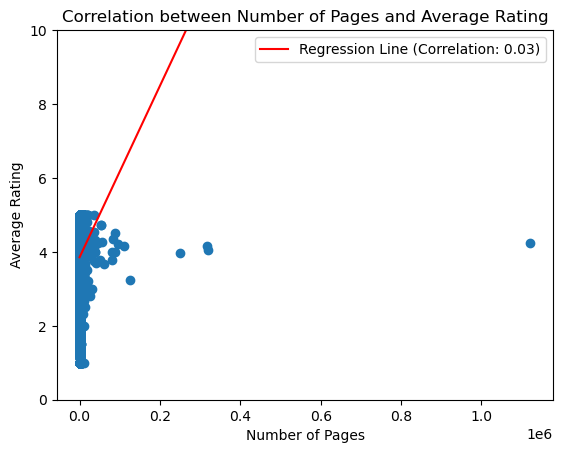

In [57]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

correlation = USABLE_DF_2['num_pages'].corr(USABLE_DF_2['average_rating'])
print(f"Correlation between book length(num_pages) and average_rating: {correlation}")

# Regression line
slope, intercept, r_value, p_value, std_err = linregress(USABLE_DF_2['num_pages'], USABLE_DF_2['average_rating'])
line = slope * USABLE_DF_2['num_pages'] + intercept

# Now we plot it to have a visual representation of the relationship between the 2 values
plt.scatter(USABLE_DF_2['num_pages'], USABLE_DF_2['average_rating']) #Data points
plt.plot(USABLE_DF_2['num_pages'], line, color='red', label=f'Regression Line (Correlation: {correlation:.2f})')
plt.xlabel("Number of Pages")
plt.ylabel("Average Rating")
plt.ylim(0,10)
plt.title("Correlation between Number of Pages and Average Rating")
plt.legend()
plt.show()

The correlation between book length (in terms of the number of pages) and average ratings is 0.03425519215412229. This value is very close to zero, indicating a very weak positive correlation between book length and average ratings.

Therefore, based on the calculated correlation, we cannot demonstrate that readers tend to rate the longest books as the worst. There is no significant correlation between book length and average ratings, and thus, we cannot conclude that longer books are rated lower by readers.

### Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

In [58]:
USABLE_DF_2['language'][USABLE_DF_2['language'].str.contains('^en', na=False)].value_counts() #there are different types of english languages

language
eng      785930
en-US     60511
en-GB     43510
en-CA      1038
en          175
enm         100
Name: count, dtype: int64

In [59]:
USABLE_DF_2[USABLE_DF_2['language'] == "enm"] #also these books are in english

,id,title,authors,author_name,author_id,work_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,original_publication_date,format,num_pages
1318454,4334280,Holy Bible KJV,None,Anonymous,5158478,6405906,enm,4.41,5:164923|4:19454|3:15611|2:9181|1:13488|total:...,222657,5633,1908,1611,King James English,1610.0
1692,2711,The Riverside Chaucer,"[{'id': '1838', 'name': 'Geoffrey Chaucer', 'r...",Geoffrey Chaucer,1838,71772,enm,4.19,5:3961|4:2345|3:1398|2:330|1:127|total:8161,8161,182,1987-12-12,1986-12-12,Hardcover,1327.0
1195786,3505109,The Riverside Chaucer,"[{'id': '1838', 'name': 'Geoffrey Chaucer', 'r...",Geoffrey Chaucer,1838,71772,enm,4.19,5:3956|4:2343|3:1395|2:330|1:128|total:8152,8152,181,2008-12-22,1986-12-12,Paperback,1327.0
45292,74178,The Riverside Chaucer,"[{'id': '1838', 'name': 'Geoffrey Chaucer', 'r...",Geoffrey Chaucer,1838,71772,enm,4.19,5:3956|4:2342|3:1395|2:330|1:128|total:8151,8151,180,1988-03-24,1986-12-12,Unknown Binding,1327.0
1493882,5945346,The Works of Shakespeare,None,William Shakespeare,947,55023367,enm,4.57,5:892|4:294|3:90|2:17|1:9|total:1302,1302,34,1944,1957-01-01,Hardcover,1312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650342,6544244,How To Tame A Rake,None,Maggi Andersen,2786221,6736527,enm,3.58,5:47|4:60|3:42|2:28|1:9|total:186,186,13,2009-02-01,2009,ebook,69.0
4993176,18858025,The Most Piteous Tale of the Morte Arthur Saun...,None,Thomas Malory,53519,26832706,enm,3.67,5:1|4:3|3:1|2:1|1:0|total:6,6,0,1485,1485-01-01,Hardcover,66.0
4955350,18758561,The Book of Sir Launcelot and Queen Guinevere,None,Thomas Malory,53519,26652825,enm,4.20,5:5|4:3|3:1|2:1|1:0|total:10,10,1,1485,1485,Hardcover,65.0
1688667,6649087,Caxton’s Book of Curtesye (E-Book),"[{'id': '301997', 'name': 'William Caxton', 'r...",William Caxton,301997,6843654,enm,4.20,5:2|4:2|3:1|2:0|1:0|total:5,5,0,1868,1487,ebook,57.0


In [60]:
import scipy.stats as stats

english_books = USABLE_DF_2['language'].str.contains('^en', na=False)
non_english_books = USABLE_DF_2[~english_books]

#Perform a two-sample t-test to compare the average rating of English and non-English books
t_stat, p_value = stats.ttest_ind(USABLE_DF_2.loc[english_books, 'average_rating'], USABLE_DF_2.loc[~english_books, 'average_rating'], equal_var=False)

# Check if the p-value is statistically significant
alpha = 0.05  #significance level
if p_value < alpha:
    conclusion = "There is a significant difference in the average rating between English and non-English books."
else:
    conclusion = "There is no significant difference in the average rating between English and non-English books."

print(f"t-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(conclusion)

t-statistic: 92.00
P-value: 0.0000
There is a significant difference in the average rating between English and non-English books.


The t-test was chosen as the appropriate statistical method to compare the average rating distribution of English and non-English books. It is well-suited for comparing means between two groups, as we aimed to determine if there was a significant difference in average ratings between the two language groups. The t-test assumes normally distributed data and provides interpretable results, such as the t-statistic and p-value. In this case, the analysis revealed a highly significant difference, supported by a very low p-value (p < 0.0001). This implies that, on average, there is a substantial distinction in book ratings between the two language groups.

Here are some possible reasons for this result:
- Readers may have varying preferences and expectations for English and non-English books

- Cultural and linguistic factors could influence how books are perceived, affecting their average ratings

###About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

In [61]:
USABLE_DF_2.loc[english_books, 'average_rating'].describe()

count    891264.000000
mean          3.900291
std           0.452270
min           1.000000
25%           3.670000
50%           3.920000
75%           4.140000
max           5.000000
Name: average_rating, dtype: float64

In [62]:
USABLE_DF_2.loc[~english_books, 'average_rating'].describe()

count    2.542744e+06
mean     3.847405e+00
std      5.065757e-01
min      1.000000e+00
25%      3.600000e+00
50%      3.880000e+00
75%      4.120000e+00
max      5.000000e+00
Name: average_rating, dtype: float64

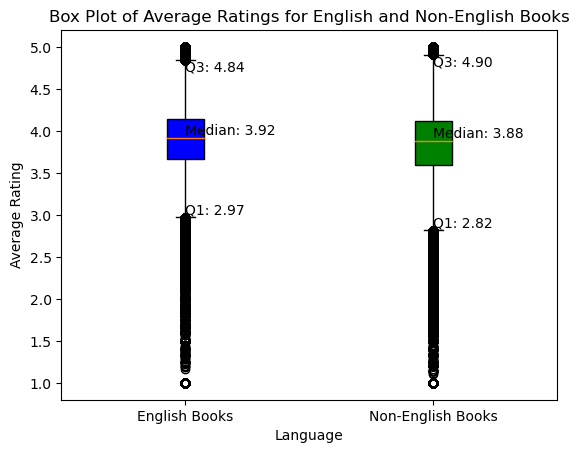

In [63]:
import matplotlib.pyplot as plt

# Data for box plot
data_to_plot = [USABLE_DF_2.loc[english_books, 'average_rating'], USABLE_DF_2.loc[~english_books, 'average_rating']]

# Labels for the box plot
labels = ['English Books', 'Non-English Books']

# Boxplot colors
boxplot_colors = ['blue', 'green']

# Create a box plot
box = plt.boxplot(data_to_plot, labels=labels, patch_artist=True)

#Box colors
for patch, color in zip(box['boxes'], boxplot_colors):
    patch.set_facecolor(color)

# Add labels and title
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.title('Box Plot of Average Ratings for English and Non-English Books')

# Add medians, Q1, and Q3 to the plot
#The whiskers are the two lines outside the box, that go from the minimum to the lower quartile (the start of the box) and then from the upper quartile (the end of the box) to the maximum.
medians = [box['medians'][0].get_ydata()[0], box['medians'][1].get_ydata()[0]]
q1 = [box['whiskers'][0].get_ydata()[1], box['whiskers'][2].get_ydata()[1]]
q3 = [box['whiskers'][1].get_ydata()[1], box['whiskers'][3].get_ydata()[1]]

for i in range(len(labels)):
    plt.text(i + 1, medians[i], f'Median: {medians[i]:.2f}', verticalalignment='bottom', fontsize=10, color='black')
    plt.text(i + 1, q1[i], f'Q1: {q1[i]:.2f}', verticalalignment='bottom', fontsize=10, color='black')
    plt.text(i + 1, q3[i], f'Q3: {q3[i]:.2f}', verticalalignment='top', fontsize=10, color='black')

# Show the plot
plt.show()

For books in **English**:

- Mean: The mean is approximately 3.9003, which is the average of the average ratings for English books.
- Median: The median is 3.9200, which is the middle value in the sorted list of average ratings for English books. Half of the values are above this, and half are below.
- Quartiles: The 25th percentile (Q1) is 3.6700, the 75th percentile (Q3) is 4.1400. Quartiles provide information about the spread of data. Q1 represents the lower 25% of the data, and Q3 represents the upper 25% of the data. The interquartile range (IQR) is Q3 - Q1, which measures the spread of the middle 50% of the data.

For books **not** in **English**:

- Mean: The mean is approximately 3.8474, which is the average of the average ratings for books not in English.
- Median: The median is 3.8800, which is the middle value in the sorted list of average ratings for books not in English. Half of the values are above this, and half are below.
- Quartiles: The 25th percentile (Q1) is 3.6000, the 75th percentile (Q3) is 4.1200. Similar to the English books, these quartiles provide insights into the spread of data for books not in English.

These statistics are helpful for understanding the central tendency (mean and median) and the spread (quartiles) of the average ratings for both groups. In a box plot, the central box represents the interquartile range (IQR) and the line inside the box represents the median. Outliers can be identified as data points beyond the "whiskers" of the box plot, helping to visualize the distribution of the data for each group.

###It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

In [65]:
data_authors = pd.read_json('lighter_authors.json', lines = True)

In [66]:
data_authors.drop(["about","image_url"],axis=1,inplace=True)

In [67]:
data_authors = data_authors.loc[(data_authors["ratings_count"]>=0) & (data_authors["average_rating"] >=1) & (data_authors["fans_count"] >=0)]

In [68]:
correlation = data_authors['fans_count'].corr(data_authors['text_reviews_count'])
correlation

0.6946060255339124

In [69]:
import statsmodels.api as sm

# Model for fans_count vs text_reviews_count
X_text_reviews = data_authors['fans_count']
y_text_reviews = data_authors['text_reviews_count']
X_text_reviews = sm.add_constant(X_text_reviews)
model_text_reviews = sm.OLS(y_text_reviews, X_text_reviews).fit()
p_value = model_text_reviews.pvalues['fans_count']

In [70]:
p_value

0.0

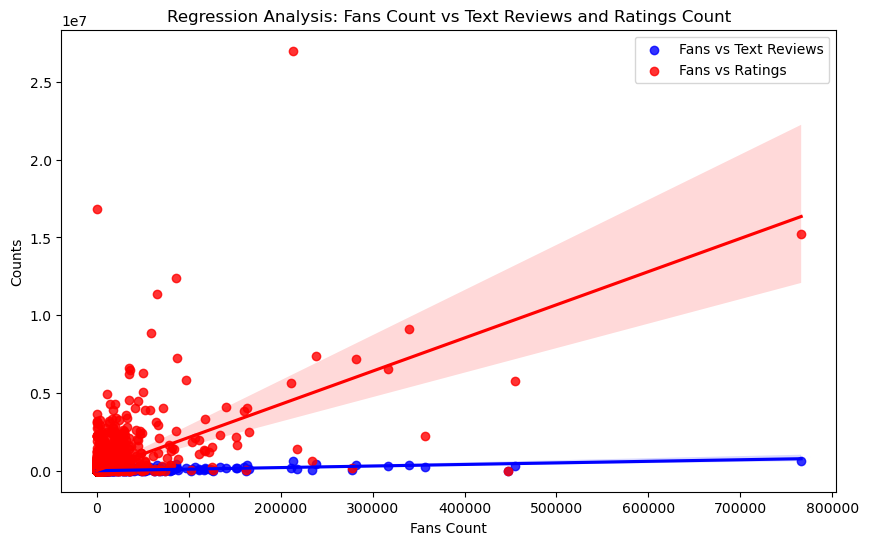

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Model for fans_count vs ratings_count
X_ratings_count = data_authors['fans_count']
y_ratings_count = data_authors['ratings_count']
X_ratings_count = sm.add_constant(X_ratings_count)
model_ratings_count = sm.OLS(y_ratings_count, X_ratings_count).fit()

plt.figure(figsize=(10, 6)) #scatterplot and dimensions

# Regression Line for fans_count vs text_reviews_count
sns.regplot(x = X_text_reviews['fans_count'], y = y_text_reviews, color = 'blue', label = 'Fans vs Text Reviews')

# Regression line for fans_count vs ratings_count
sns.regplot(x = X_ratings_count['fans_count'], y = y_ratings_count, color = 'red', label = 'Fans vs Ratings')

plt.legend()
plt.xlabel('Fans Count')
plt.ylabel('Counts')
plt.title('Regression Analysis: Fans Count vs Text Reviews and Ratings Count')
plt.show()

The correlation of 0.6946060255339133 between the number of fans and the number of reviews for authors is positive and quite strong, indicating a clear positive relationship. Importantly, the p-value is 0, showing that this relationship is highly statistically significant. A p-value of 0 means there is an extremely low chance of observing such a strong correlation between these variables by random chance. This provides robust statistical evidence that the number of fans is indeed connected to the number of reviews for authors.

Based on these results, it's safe to say that authors with more fans tend to receive more reviews, and we can confidently dismiss the notion that fans are "lazy." The relationship between the number of fans and the number of reviews is evidently significant and positive.

However, to dig deeper into this topic, we also created another regression model, comparing fans_count to ratings_count. Upon comparing both regression lines, it becomes clear that there is a stronger relationship between fans_count and ratings_count compared to fans_count and text_reviews_count. Therefore, one could argue that, in reality, fans might be somewhat less active in terms of leaving text reviews.

###Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.


----------------------------------------------
**STATISTICAL TESTS**

Statistical tests are fundamental in data analysis and mining, enabling the extraction of meaningful insights and informed decision-making. They serve as tools for researchers and analysts to assess the statistical significance of patterns, relationships, and disparities within datasets, aiding systematic data exploration.

The t-Test is used to compare the means of two groups, identifying if there are significant differences. The Chi-Square Test, on the other hand, is used to examine the independence between two categorical variables. These tests play a crucial role in evaluating hypotheses and extracting meaningful insights from data. Correlation tests, like the Pearson and Spearman methods, reveal the strength and direction of linear relationships between continuous variables, applied in fields like finance and epidemiology.
Regression analysis, encompassing linear and logistic regression, empowers analysts to model relationships between variables. For example, linear regression predicts the impact of one variable on another, such as forecasting sales based on advertising expenditure.

**PARAMETRIC AND NON-PARAMETRIC**

Parametric tests assume specific data distributions and provide robust results when data aligns with assumptions, although they require substantial sample sizes and may not suit all data types. Nonparametric tests are distribution-free and robust in the presence of data distribution deviations, often more suitable for smaller samples, though they exhibit reduced statistical power.

In conclusion, the choice between parametric and nonparametric tests depends on data characteristics and research objectives. Parametric tests excel under specific assumptions, offering enhanced power and precision. In contrast, nonparametric tests, versatile and robust, are well-suited to various research scenarios, especially when data distribution remains uncertain. Researchers must carefully evaluate the merits and limitations of each approach for informed and methodologically sound outcomes.


## Bonus Points

1.

- Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload authors.json dataset, and filter authors with at least 100 reviews. Do the same using Pandas and compare performance in terms of milliseconds.

- Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload books.json, and join them with authors.json based on author_id. How many books don’t have a match for the author?


In [ ]:
import dask.dataframe as dd
import pandas as pd
import datetime


In [ ]:
start_time = datetime.datetime.now()

data_auth_dask = dd.read_json('lighter_authors.json',blocksize=16 * 1024 * 1024) #16MB chunks
data_auth_dask.query(f'text_reviews_count > {100}').compute()

end_time = datetime.datetime.now()

time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print("Milliseconds elapsed for DASK:",round(execution_time,2),"ms")

Milliseconds elapsed for DASK: 18348.268 ms


In [ ]:
start_time = datetime.datetime.now()

data_auth = pd.read_json('lighter_authors.json',lines=True)
data_auth.loc[data_auth.text_reviews_count > 100]

end_time = datetime.datetime.now()

time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print("MIlliseconds elapsed for PANDAS:",round(execution_time,2),"ms")

MIlliseconds elapsed for PANDAS: 14451.841999999999 ms


The performance are comparable, however when it comes to load a large dataset, DASK is extremely fast

In [ ]:
data_books_dask = dd.read_json('lighter_books.json',blocksize=32 * 1024 * 1024)
data_auth_dask = data_auth_dask.rename(columns={"id":"author_id"})

In [ ]:
data_auth_dask.describe

<bound method _Frame.describe of Dask DataFrame Structure:
               ratings_count average_rating text_reviews_count work_ids book_ids works_count author_id    name  gender image_url   about fans_count
npartitions=32                                                                                                                                     
                       int64        float64              int64   object   object       int64     int64  object  object    object  object      int64
                         ...            ...                ...      ...      ...         ...       ...     ...     ...       ...     ...        ...
...                      ...            ...                ...      ...      ...         ...       ...     ...     ...       ...     ...        ...
                         ...            ...                ...      ...      ...         ...       ...     ...     ...       ...     ...        ...
                         ...            ...          

In [ ]:
data_books_dask.describe

<bound method _Frame.describe of Dask DataFrame Structure:
                    id   title authors author_name author_id work_id    isbn  isbn13    asin language average_rating rating_dist ratings_count text_reviews_count publication_date original_publication_date  format edition_information image_url publisher num_pages series_id series_name series_position shelves description
npartitions=480                                                                                                                                                                                                                                                                                                                 
                 int64  object  object      object     int64   int64  object  object  object   object        float64      object         int64              int64           object                    object  object              object    object    object    object    object      object          objec

In [ ]:
join = data_books_dask.merge(data_auth_dask, on='author_id', how='inner')
join.compute()


## AWS Question (AWSQ)

#### Configuration of the EC2 instance on AWS

- AMI (Amazon Machine Image) : Ubuntu Server 22.04 LTS, SSD Volume Type (The default choice when selecting a new Ubuntu image on AWS)
- Istance Type : t2.micro with 1vCPU, 1 GiB of RAM
- Storage : 20 GiB of generic use SSD (gp2)

#### Command used to connect
- For this task i've used puTTy and WinSCP. The first one is for connecting remotely to the machine whereas the second one is for data trasferring between the local machine and the EC2 instance. Once created, i opened puTTY and filled the blanks ("Host Name", Port, connection type) and under the category "Connection/SSH/credentials" i added the key-value-pair to connect to the instance.

- WinSCP was used as a GUI interface to upload "list.json" and "list_script.py". No command were used since it was simply a drag and drop action from a folder in the local machine to a folder in the EC2 instance. The connection setup for WinSCP was exactly the same as puTTY.





![image.png](attachment:image.png)



![image-2.png](attachment:image-2.png)

Once connected i typed the following commands to setup the machine for the python script:
- sudo apt update && sudo apt upgrade     (generally used to update a new machine)
- sudo apt install python3-pip            (pip for then downloading pandas library)
- pip install pandas                      (download pandas library)


- The following two lines are the outputs (with system time) for both the local and aws machine



('romance', 6001)
('fiction', 5291)
('young-adult', 5016)
('fantasy', 3666)
('science-fiction', 2779)
Milliseconds elapsed for AWS_EC2_MACHINE: 49995.11 ms


('romance', 6001)
('fiction', 5291)
('young-adult', 5016)
('fantasy', 3666)
('science-fiction', 2779)
Milliseconds elapsed for LOCAL_MACHINE: 29105.07 ms

- This is a prettier version of the output

| Tag             | #usage |
|-----------------|--------|
| romance         | 6001   |  
| fiction         | 5291   |
| young-adult     | 5016   |
| fantasy         | 3666   |
| science-fiction | 2779   |


| Machine | time elapsed (in ms) |
|---------|------|
| EC2 | 49995.11 ms|
| Local | 29105.07 ms|

And below the outputs from each terminal


![image.png](attachment:image.png)

![image.png](attachment:image.png)

#### Considerations and comments

- The script was modified to fit the specifications of the EC2 instance, so the chunksize has been set to 200
- The "Local" machine is considerably faster, but we have to keep in mind that a better ubuntu instance could be much faster

## Command Line Question (CLQ)

For this task we used JQ as a Json parser (and as a command line tool). Below we find the 2 output, the "original" and the improved one

![image.png](attachment:image.png)

![image.png](attachment:image.png)

For the improved one we asked the following things:
- How can i create a .sh file in less than 3 lines
- If i don't want to specify the Json file i use in the terminal, is it possible to add it in the code

### Here is the explanation of the improved script from ChatGPT


1. Set the JSON file path: json_file="series.json"
2. Check if jq is installed: jq -e . "$json_file" >/dev/null 2>&1 || { echo "Error: jq is not installed or the JSON file is invalid."; exit 1; }
3. This line checks if the jq command-line tool is installed and if the provided JSON file is valid. It does this by attempting to run jq -e . "$json_file". If jq is not installed or the JSON file is invalid, it will print an error message and exit with a status code of 1.
4. Timing the execution: time. The time command is used to measure the execution time of the jq commands and provide information about how long they took to run.
5. Process the JSON file: time jq -r '. | {id, title, total_books_count: [.works[]| (.books_count | tonumber)] | add}' "$json_file" | jq -s 'sort_by(-.total_books_count) | .[:5] | .[] | "ID:\(.id) | TITLE:\(.title) | TOTAL_BOOKS_COUNT:\(.total_books_count)"'

This is the main part of the script, where the JSON file is processed.

Let's break down this line step by step:

jq -r '. | {id, title, total_books_count: [.works[]| (.books_count | tonumber)] | add}' "$json_file":
This part of the command uses jq to perform the following operations:

It reads the contents of the JSON file specified by the json_file variable.
It then extracts specific fields from the JSON data, creating a new JSON object for each entry in the array.
The extracted fields are "id," "title," and "total_books_count," where "total_books_count" is calculated by iterating over the "works" array and summing up the "books_count" values after converting them to numbers.
jq -s 'sort_by(-.total_books_count) | .[:5] | .[] | "ID:\(.id) | TITLE:\(.title) | TOTAL_BOOKS_COUNT:\(.total_books_count)"':
This part of the command further processes the JSON data obtained from the previous jq command.

It first sorts the JSON objects based on the "total_books_count" field in descending order (largest to smallest).
It then selects the first five elements from the sorted array.
Finally, it extracts the "id," "title," and "total_books_count" fields from each of the top five elements and formats them into a string with labels.



To check if it's correct we simply compare the two results we see in the images

## Algorithmic Question (AQ)



- Implement a code to answer the problem above.


In [ ]:

def supervisor_instructions(instructions):                        # We enter a function to process instructions from the supervisor
    left_shelf = []  # Inside the function, we create a list to store books on the shelf on the left side of the function
    right_shelf = [] # Inside the function, we create a list to store books on the shelf on the right side of the function
    total_amount_of_books = 0  # Enter a variable to account for the total number of books on the shelf
    keep_answers = []  # And also a list for storing responses to Type 3 instructions

    for instruction in instructions:      # Let's start parsing each instruction in order, provided in the list of instructions
        command, *params = instruction.split()
        if command == "L":
            # For "L" instructions, we add the book id to the left_shelf list, placing it to the left of the leftmost existing book
            book_id = int(params[0])
            left_shelf.append(book_id)
        elif command == "R":
            # For "R" instructions, we add the book ID to the right_shelf list, placing it to the right of the rightmost existing book
            book_id = int(params[0])
            right_shelf.append(book_id)
        elif command == "?":
            # For "?" instructions, we calculate the minimum number of books to retrieve from the left or right to make the book with the specified identifier the leftmost or rightmost book on the shelf.
            #To do this, we find the position of the book in the corresponding shelf list (or the length of the list if the book is missing) and calculate the difference between the total number of books and the number of books on the left.
            #Then the minimum of these two values is added to the list
            book_id = int(params[0])
            left_count = left_shelf.index(book_id) if book_id in left_shelf else len(left_shelf)
            right_count = len(right_shelf) - right_shelf.index(book_id) if book_id in right_shelf else len(right_shelf) + total_amount_of_books - len(left_shelf)
            keep_answers.append(min(left_count, right_count))

        total_amount_of_books += 1 #Update the total_amount_of_books variable to track the total number of books

    return keep_answers

#Enter a number that represents the number of instructions the supervisor will provide
number_of_instructions = int(input())
instructions = [input() for _ in range(number_of_instructions)] #Generate a list of instructions, where each element of the list represents one instruction
keep_answers = supervisor_instructions(instructions) # Answer the instructions

# And display responses to supervisor's instructions
for answer in keep_answers:
    print(answer)

def supervisor_instructions(instructions):                        # We enter a function to process instructions from the supervisor
    left_shelf = []  # Inside the function, we create a list to store books on the shelf on the left side of the function
    right_shelf = [] # Inside the function, we create a list to store books on the shelf on the right side of the function
    total_amount_of_books = 0  # Enter a variable to account for the total number of books on the shelf
    keep_answers = []  # And also a list for storing responses to Type 3 instructions

    for instruction in instructions:      # Let's start parsing each instruction in order, provided in the list of instructions
        command, *params = instruction.split()
        if command == "L":
            # For "L" instructions, we add the book id to the left_shelf list, placing it to the left of the leftmost existing book
            book_id = int(params[0])
            left_shelf.append(book_id)
        elif command == "R":
            # For "R" instructions, we add the book ID to the right_shelf list, placing it to the right of the rightmost existing book
            book_id = int(params[0])
            right_shelf.append(book_id)
        elif command == "?":
            # For "?" instructions, we calculate the minimum number of books to retrieve from the left or right to make the book with the specified identifier the leftmost or rightmost book on the shelf.
            #To do this, we find the position of the book in the corresponding shelf list (or the length of the list if the book is missing) and calculate the difference between the total number of books and the number of books on the left.
            #Then the minimum of these two values is added to the list
            book_id = int(params[0])
            left_count = left_shelf.index(book_id) if book_id in left_shelf else len(left_shelf)
            right_count = len(right_shelf) - right_shelf.index(book_id) if book_id in right_shelf else len(right_shelf) + total_amount_of_books - len(left_shelf)
            keep_answers.append(min(left_count, right_count))

        total_amount_of_books += 1 #Update the total_amount_of_books variable to track the total number of books

    return keep_answers

number_of_instructions = int(input()) #Enter a number that represents the number of instructions the supervisor will provide
instructions = [input() for _ in range(number_of_instructions)] #Generate a list of instructions, where each element of the list represents one instruction
keep_answers = supervisor_instructions(instructions) # Answer the instructions

# And display responses to supervisor's instructions
for answer in keep_answers:
    print(answer)


*   Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation).

ChatGPT says: "The code has a time complexity of O(n) where n is the number of instructions. It efficiently processes the instructions in a linear fashion, making it a reasonably efficient algorithm for this problem."


*   Do you believe this is correct? How can you double-check it? Elaborate about your answer.

The code processes instructions linearly and the code execution time directly depends on the size of the input data, i.e. the number of instructions. This means that as the number of instructions increases, the time required to process them also increases proportionally. The time complexity of the code is thus O(n), where 'n' is the number of instructions. This property is a characteristic for algorithms with linear time complexity. It is important to note that the code processes each instruction sequentially and the instruction processing occurs only once. Therefore, as the size of the input data increases, the total execution time of all instructions will increase proportionally.

To double-check the analysis of the code's time complexity we can:
Firstly, we must understand the code to make sure that it is linear, so to make sure that the code processes each instruction once. And that operations inside loops have constant complexity. Also, there should be no nested loops or complex recursive operations in the code.
Secondly, we should test the code with large input data and observe how the execution time changes when the 'n' value increases linearly. If the execution time increases linearly, this is real evidence that the time complexity of the code is indeed O(n).
Eventually we should assume then there may be a worse scenario, but the time complexity will still be bounded by O(n). Considering these conditions, we can make sure that the analysis of time complexity is correct and corresponds to the real time performance of the code.


*   Is the algorithm proposed in (1.) the optimal one to produce the required output? If not, can you suggest a better algorithm to perform the same task?

The algorithm proposed in (1.) can be better. Linear search in such lists takes time proportional to the number of books, which may be inefficient. We can use data structures such as dictionaries or sets, which provide faster searches based on book identifiers. This can significantly increase the time complexity of the code. The optimal solution is to choose efficient data structures that provide fast search and improve the overall performance of the algorithm.

1. The more optimal time complexity of the algorithm is due to the use of `left_shelf` and `right_shelf` lists to represent the left and right sides of the shelf. These lists store book identifiers, and when a book identifier is searched using `left_shelf.indexing(an_id_of_the_book)` or `right_shelf.indexing(an_id_of_the_book)`. The linear search takes time proportional to the number of items in the list. In the worst case, when a book is not found on the shelf, the search may take O(k) time, where 'k' is the number of books placed on the shelf.



2. The using of dictionaries/sets will help to provide O(1) time complexity for search operations. In case of dictionaries, keys can be book identifiers and values can be their positions on the shelf, which provides direct access.
"""